# Lista 2

## Grafy losowe 

Generujemy sieć Erdos-Renyi o N = 100 i p = 0.05, a następnie listujemy wszystkie wierzchołki i krawędzie.

In [2]:
import networkx as nx
import numpy as np
import seaborn as sb
import scipy

N = 100
p = 0.05
er_graph = nx.erdos_renyi_graph(N, p)

print(f"Wierzcholki: {er_graph.nodes}")
print(f'Krawedzie: {er_graph.edges}')

Wierzcholki: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Krawedzie: [(0, 62), (1, 37), (1, 62), (1, 72), (1, 83), (2, 59), (2, 62), (2, 67), (2, 71), (2, 74), (2, 84), (3, 13), (3, 56), (4, 11), (4, 26), (4, 52), (4, 61), (4, 67), (4, 87), (4, 90), (4, 94), (5, 7), (5, 35), (5, 40), (5, 86), (5, 95), (5, 96), (6, 31), (6, 32), (6, 48), (6, 81), (6, 83), (6, 96), (7, 53), (7, 71), (7, 83), (8, 53), (8, 67), (8, 83), (9, 24), (9, 32), (9, 39), (9, 86), (9, 92), (10, 32), (10, 33), (10, 66), (10, 70), (11, 27), (11, 34), (11, 41), (11, 46), (11, 89), (12, 25), (12, 33), (12, 73), (12, 92), (13, 43), (13, 48), (13, 52), (13, 64), (13, 94), (14, 16),

Histogram stopni wierzchołków

Text(0.5, 0, 'Degree')

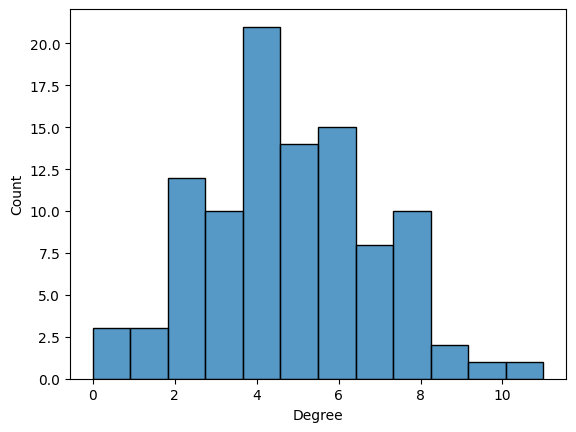

In [3]:
degrees = [d[1] for d in er_graph.degree]
plot = sb.histplot(degrees, bins=len(set(degrees)))
plot.set_xlabel("Degree")

Liczba komponentów w grafie

In [4]:
nx.number_connected_components(er_graph)

4

Wizualizacja grafu, gdzie wielkość węzła jest proporcjonalna do jego wartości pagerank

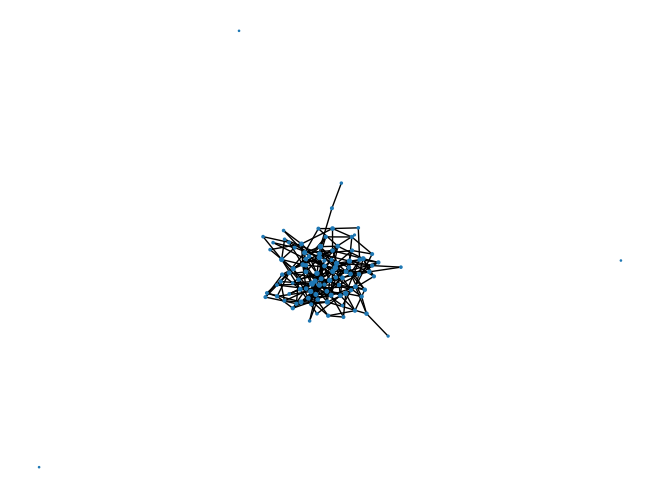

In [43]:
page_rank = np.array(list(nx.pagerank(er_graph).values())) * 500

nx.draw(er_graph, node_size=page_rank)

## Sieci bezskalowe

Generacja grafu wedle modelu Barabasi-Albert z $N = 1000$ i $m_0 = m = 3$ oraz wizualizacja layoutem Kamada-Kawai

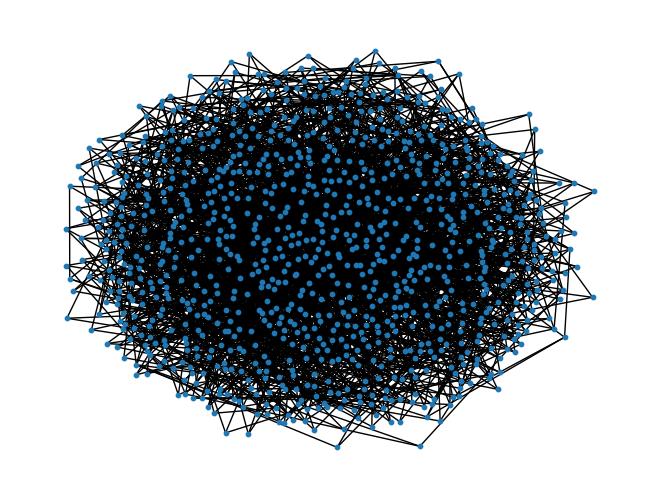

In [6]:
N = 1000
m = 3

ba_graph = nx.barabasi_albert_graph(N, m)
nx.draw_kamada_kawai(ba_graph, node_size=10)

Znalezienie najbardziej centralnego węzła według miary pośrednictwa

In [7]:
betweeness = nx.betweenness_centrality(ba_graph)
print(f'Numer węzła: {max(betweeness, key=betweeness.get)}')

Numer węzła: 0


Średnica grafu

In [8]:
nx.diameter(ba_graph)

6

Różnice między grafami Barabasi-Albert i Erdos-Renyi:
- Graf Erdos-Renyi ma podobny rozkład stopni wszystkich wierzchołków, natomiast graf Barabasi-Albert ma tym większy stopień wierzchołka, im mniejszy jest jego indeks (czyli im wcześniej został utworzony w czasie generacji).
- W grafie Erdos-Renyi mogą pojawić się wierzchołki bez krawędzi, natomiast w grafie Barabasi-Albert taka sytuacja nie ma miejsca.

## Praca z rzeczywistymi danymi
Wczytanie zbioru *out.radoslaw_email_email* i wypisanie liczby wierzchołków i krawędzi utworzonego grafu

In [9]:
file = "radoslaw_email/out.radoslaw_email_email"

data = []
with open(file, "r") as f:
    f.readline()
    f.readline()
    for line in f:
        vals = line.strip().split()
        data.append((int(vals[0]), int(vals[1])))

graph = nx.MultiGraph()
graph.add_edges_from(data)
print(graph)

MultiGraph with 167 nodes and 82927 edges


Usunięcie wielokrotnych krawędzi

In [10]:
cleaned_graph = nx.Graph(graph)
print(cleaned_graph)

Graph with 167 nodes and 3251 edges


Usunięcie pętli

In [11]:
cleaned_graph.remove_edges_from(nx.selfloop_edges(cleaned_graph))
print(cleaned_graph)

Graph with 167 nodes and 3250 edges


Liczba krawędzi spadła o $79677$

Histogram stopni wierzchołków

[(1, 130), (2, 69), (3, 68), (4, 65), (5, 54), (6, 48), (7, 76), (8, 57), (9, 63), (10, 61), (11, 25), (12, 27), (13, 64), (14, 65), (15, 64), (16, 24), (17, 35), (18, 83), (19, 40), (20, 50), (21, 55), (22, 55), (23, 80), (24, 42), (25, 34), (26, 54), (27, 66), (28, 19), (29, 69), (30, 48), (31, 53), (32, 62), (33, 50), (34, 33), (35, 128), (36, 41), (37, 136), (38, 139), (39, 46), (40, 57), (41, 26), (42, 84), (43, 49), (44, 62), (45, 136), (46, 84), (47, 130), (48, 55), (49, 34), (50, 93), (51, 30), (52, 29), (53, 55), (54, 48), (55, 29), (56, 69), (57, 55), (58, 53), (59, 58), (60, 29), (61, 29), (62, 47), (63, 57), (64, 40), (65, 49), (66, 57), (67, 50), (68, 66), (69, 72), (70, 61), (71, 54), (72, 53), (73, 42), (74, 48), (75, 48), (76, 50), (77, 47), (78, 12), (79, 41), (80, 60), (81, 53), (82, 43), (83, 57), (84, 67), (85, 46), (86, 69), (87, 40), (88, 46), (89, 39), (90, 70), (91, 21), (92, 14), (93, 55), (94, 72), (95, 49), (96, 23), (97, 7), (98, 50), (99, 22), (100, 40), (1

Text(0.5, 0, 'Degree')

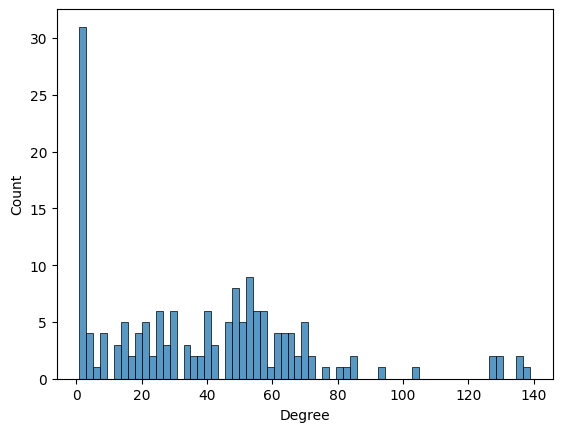

In [12]:
print(cleaned_graph.degree)
degrees = [d[1] for d in cleaned_graph.degree]
plot = sb.histplot(degrees, bins=len(set(degrees)))
plot.set_xlabel("Degree")

Text(0.5, 0, 'Betweeness centrality')

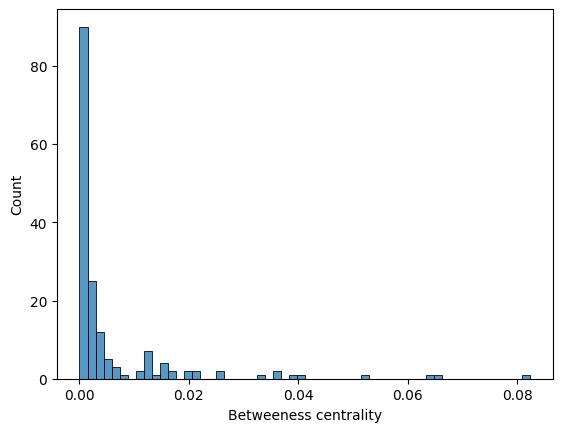

In [13]:
betweeness = nx.betweenness_centrality(cleaned_graph)
plot = sb.histplot(list(betweeness.values()))
plot.set_xlabel("Betweeness centrality")

Text(0.5, 0, 'Closeness centrality')

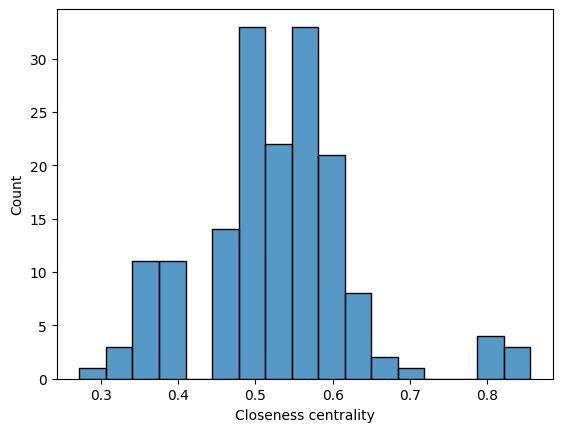

In [14]:
closeness = nx.closeness_centrality(cleaned_graph)
plot = sb.histplot(list(closeness.values()))
plot.set_xlabel("Closeness centrality")

Miara W Kendalla dla bliskości i pośrednictwa

In [15]:
kend = scipy.stats.weightedtau(list(closeness.values()), list(betweeness.values()))
print(kend.statistic)

0.8603258011779653


Miara W Kendalla dla pośrednictwa i stopni węzłów

In [32]:
kend = scipy.stats.weightedtau(degrees, list(betweeness.values()))
print(kend.statistic)

0.8648912431899067


Miara W Kendalla dla bliskości i stopni węzłów

In [33]:
kend = scipy.stats.weightedtau(degrees, list(closeness.values()))
print(kend.statistic)

0.979218529783024


Oznacza to, że w większości przypadków wierzchołki mające największe wartości jednej z miary są równie wysoko w pozostałych rankingach

Liczba komponentów w grafie

In [16]:
nx.number_connected_components(cleaned_graph)

1

Oznacza to, że nie może być żadnego wierzchołka bez krawędzi - byłby on również komponentem

In [17]:
print(f'Srednica grafu: {nx.diameter(cleaned_graph)}')
print(f'Srednia dlugosc sciezki w grafie: {nx.average_shortest_path_length(cleaned_graph)}')

Srednica grafu: 5
Srednia dlugosc sciezki w grafie: 1.9673905201644903


Średnica grafu nie różni się wiele od średniej długości ścieżki w grafie

Teraz tworzymy graf skierowany na podstawie tych samych danych, gdzie waga pomiędzy krawędzą $v_1$ a $v_2$ to stosunek liczby wiadomości wysłanych z wierzchołka $v_1$ do $v_2$ do wszystkich wiadomości wysłanych przez wierzchołek $v_1$

In [28]:
from collections import Counter

data = []
node_edges_counter = Counter()
messages_sent_counter = Counter()
with open(file, "r") as f:
    f.readline()
    f.readline()
    for line in f:
        vals = line.strip().split()
        start_node, end_node = int(vals[0]), int(vals[1])
        node_edges_counter[start_node] += 1
        messages_sent_counter[(start_node, end_node)] += 1
        data.append((start_node, end_node))

di_graph = nx.DiGraph()
for start, end in messages_sent_counter.keys():
    di_graph.add_edge(start, end, weight=messages_sent_counter[(start_node, end_node)] / node_edges_counter[start_node])
print(di_graph)


DiGraph with 167 nodes and 5784 edges


Sprawdzamy, czy w tym grafie skierowanym można dostać się z każdego wierzchołka do każdego innego. W tym celu sprawdzamy, czy graf jest spójny.

In [31]:
print(nx.is_strongly_connected(di_graph))

False


Graf nie jest spójny, więc nie da się dotrzeć z każdego wierzchołka do każdego innego